In [6]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import math
import seaborn as sns
from scipy.stats import probplot

import warnings
warnings.filterwarnings('ignore')

In [67]:
# read catalunya.csv
cat = pd.read_csv('/Users/albapi/Desktop/uni/2n_sem/social_data/social_data_assignments/final_project/data/catalunya.csv')
mad = pd.read_csv('/Users/albapi/Desktop/uni/2n_sem/social_data/social_data_assignments/final_project/data/madrid.csv')
#mall = pd.read_csv('/Users/albapi/Desktop/uni/2n_sem/social_data/social_data_assignments/final_project/data/mallorca2.csv')
mall = pd.read_csv(
    '/Users/albapi/Desktop/uni/2n_sem/social_data/social_data_assignments/final_project/data/mallorca2.csv',
    delimiter=';',
    on_bad_lines='skip'  # Skip problematic rows
)
vlc = pd.read_csv('/Users/albapi/Desktop/uni/2n_sem/social_data/social_data_assignments/final_project/data/valencia.csv')



In [68]:
mall.head()

,Categoria,Direcció,Grup,Signatura,Tipus de vivenda turística ETV amb limitació d'us,UTM(Y),Explotador/s,UTM (X),Tipus de vivenda turística ETV plurifamiliar,Tipus de vivenda turística,...,Mesos de comercialització,Unitats,Localitat,Inici dactivitat,Estat,Places,Municipi,Nombre de banys,longitude,latitude
0,NaN,"CIUTAT, 2. 07570 ARTÀ, Mallorca",Comercialitzador destades,CE/1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Artà,19/06/2007,Alta,NaN,ARTÀ,NaN,NaN,NaN
1,NaN,"URXELLA, 23. 07470 POLLENÇA, Mallorca",Comercialitzador destades,CE/10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Port De Pollença,14/09/2007,Alta,NaN,POLLENÇA,NaN,NaN,NaN
2,NaN,"VILLALONGA,, 11. 07680 Portocristo, MANACOR, M...",Comercialitzador destades,CE/100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Portocristo,17/12/2010,Alta,NaN,MANACOR,NaN,NaN,NaN
3,NaN,"SALVADOR DALÍ, 4. 07400 ALCÚDIA, Mallorca",Comercialitzador destades,CE/11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Alcúdia,14/09/2007,Alta,NaN,ALCÚDIA,NaN,NaN,NaN
4,NaN,"DE LA PLAYA,, 19 local B. 07400 ALCÚDIA, Mallorca",Comercialitzador destades,CE/12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Alcúdia,03/10/2007,Alta,NaN,ALCÚDIA,NaN,NaN,NaN


In [78]:
# CLEAN CATALUNYA DATA
# check for missing values
# print(cat.isnull().sum())

print(cat.columns)
print(cat['Tipus establiment'].unique()) # Decidir con cual nos quedamos
# cat['Tipus establiment'] quedarse con 'Apartaments Turístics' 'Apartaments turístics' "Habitatges d'ús turístic"
filtered_cat = cat[cat['Tipus establiment'].isin(['Apartaments Turístics', 'Apartaments turístics', "Habitatges d'ús turístic"])]
filtered_cat['Tipus establiment'] = filtered_cat['Tipus establiment'].replace('Apartaments Turístics', 'Apartaments turístics')

# print(cat['Tipus de via'], cat['Nom de la via'], cat['Número'], cat['Codi Postal'], cat['Municipi'], cat['Comarca'], cat['Província'])

cat_filt = filtered_cat[['Tipus establiment', 'Tipus de via', 'Nom de la via', 'Número', 'Codi Postal', 'Municipi', 'Comarca', 'Província']]

cat_filt['Direcció'] = cat_filt['Tipus de via'] + ' ' + cat_filt['Nom de la via'] + ' ' + cat_filt['Número'].astype(str)
cat_filt = cat_filt.drop(columns=['Tipus de via', 'Nom de la via', 'Número'])
print(cat_filt.head())

print(cat['Comarca'].unique())


Index(['Tipus establiment', 'Número inscripció', 'Dígit de control', 'Rètol',
       'Estat', 'Tipus de via', 'Nom de la via', 'Número', 'Pis', 'Porta',
       'Escala', 'Bloc', 'Codi Postal', 'Municipi', 'Codi Municipi (IDESCAT)',
       'Comarca', 'Codi Comarca (IDESCAT)', 'Província',
       'Referència cadastral', 'Cèdula d'habitabilitat', 'Grup', 'Modalitat',
       'Categoria', 'Unitat d'allotjament', 'Total places', 'Total estances',
       'SSTT', 'Marca turística', 'CIF', 'Raó Social del titular',
       'Nom del titular', 'Primer cognom', 'Segon cognom'],
      dtype='object')
['Apartaments Turístics' 'Apartaments turístics' 'Càmpings' 'Hotels'
 "Habitatges d'ús turístic" 'Turisme rural']
       Tipus establiment  Codi Postal       Municipi         Comarca  \
0  Apartaments turístics         8860  Castelldefels  Baix Llobregat   
1  Apartaments turístics         8001      Barcelona      Barcelonès   
2  Apartaments turístics         8870         Sitges          Garraf   
3  A

In [39]:
# CLEAN VALENCIA DATA
# check for missing values
# print(vlc.isnull().sum())

print(vlc.columns)
#print(vlc['Tipo'].unique()) # Decidir con cual nos quedamos
#canviar nombre de la columna 'Tipo' a 'Tipus establiment'
#vlc.rename(columns={'Tipo': 'Tipus establiment'}, inplace=True)

vlc_filt = vlc[['Tipus establiment', 'Dirección', 'C.P.', 'Municipio', 'Comarca', 'Provincia','Fecha alta']]

print(vlc_filt.columns)

# canviar nom de les columnes
vlc_filt.rename(columns={'Dirección': 'Direcció', 'C.P.': 'Codi Postal', 'Municipio': 'Municipi', 'Comarca': 'Comarca', 'Provincia': 'Província'}, inplace=True)
# cambiar nom de la columna 'Fecha alta' a 'Data alta'
vlc_filt.rename(columns={'Fecha alta': 'Data alta'}, inplace=True)
print(vlc_filt.columns)
# cat['Tipus establiment'] quedarse con 'Apartaments Turístics' 'Apartaments turístics' "Habitatges d'ús turístic"
#filtered_cat = cat[cat['Tipus establiment'].isin(['Apartaments Turístics', 'Apartaments turístics', "Habitatges d'ús turístic"])]
#filtered_cat['Tipus establiment'] = filtered_cat['Tipus establiment'].replace('Apartaments Turístics', 'Apartaments turístics')

# print(cat['Tipus de via'], cat['Nom de la via'], cat['Número'], cat['Codi Postal'], cat['Municipi'], cat['Comarca'], cat['Província'])

#cat_filt = filtered_cat[['Tipus establiment', 'Tipus de via', 'Nom de la via', 'Número', 'Codi Postal', 'Municipi', 'Comarca', 'Província']]


Index(['_id', 'Signatura', 'Cod. Estado', 'Estado', 'Cod.Tipo',
       'Tipus establiment', 'Cod. Categoria', 'Categoría', 'Nombre',
       'Cod. Provincia', 'Provincia', 'Cod. Municipio', 'Municipio', 'Comarca',
       'C.P.', 'Dirección', 'Urbanizacion', 'Edificio', 'Bloque', 'Escalera',
       'Piso', 'Puerta', 'Cod. Tipo Via', 'Tipo Via', 'Via', 'Número', 'Email',
       'Web', 'Cod. Situacion', 'Situación', 'Es Apartahotel',
       'Núm. Apartamentos', 'Plazas', 'Fecha alta', 'Fecha baja'],
      dtype='object')
Index(['Tipus establiment', 'Dirección', 'C.P.', 'Municipio', 'Comarca',
       'Provincia', 'Fecha alta'],
      dtype='object')
Index(['Tipus establiment', 'Direcció', 'Codi Postal', 'Municipi', 'Comarca',
       'Província', 'Data alta'],
      dtype='object')


In [46]:
# CLEAN MADRID DATA
# check for missing values
print(mad.isnull().sum())
print(mad.head())
print(mad['alojamiento_tipo'].unique()) # Decidir con cual nos quedamos

# ['HOTEL' 'PENSION' 'HOSTAL' 'CASA HUESPEDES' 'HOTEL-APART.'
# 'APARTAMENTO RURAL' 'HOTEL RURAL' 'CASA RURAL' 'APART-TURISTICO'
# 'HOSTERIAS' 'VIVIENDAS DE USO TU' 'CAMPING']
#quedarse con 'APART-TURISTICO' 'VIVIENDAS DE USO TU'
mad_filt = mad[mad['alojamiento_tipo'].isin(['APART-TURISTICO', 'VIVIENDAS DE USO TU'])]

mad_filt['Direcció'] = mad_filt['via_tipo'] + ' ' + mad_filt['via_nombre'] + ' ' + mad_filt['numero'].astype(str)
mad_filt = mad_filt.drop(columns=['via_tipo', 'via_nombre', 'numero'])

mad_filt = mad_filt[['alojamiento_tipo', 'Direcció', 'cdpostal', 'localidad']]

mad_filt.rename(columns={'alojamiento_tipo': 'Tipus establiment', 'cdpostal': 'Codi Postal', 'localidad': 'Municipi'}, inplace=True)
print(mad_filt.head())


_id                     0
alojamiento_tipo        0
categoria               0
denominacion         2202
via_tipo                0
via_nombre             18
numero                 17
bloque              12812
portal              12528
escalera            11718
planta               2065
puerta               2857
cdpostal              883
localidad               0
signatura               0
dtype: int64
   _id alojamiento_tipo  categoria  denominacion via_tipo       via_nombre  \
0    1            HOTEL    3-HOTEL  GRAN LEGAZPI    PASEO    de la Chopera   
1    2          PENSION  2-PENSION        ISABEL    CALLE      de la Salud   
2    3           HOSTAL   2-HOSTAL        BESAYA    CALLE  de San Bernardo   
3    4           HOSTAL   3-HOSTAL    ASTORIA II      CRA  de San Jerónimo   
4    5           HOSTAL   3-HOSTAL      ALHAMBRA    CALLE  de Espoz y Mina   

  numero bloque portal escalera planta puerta  cdpostal localidad signatura  
0     71    NaN    NaN      NaN    NaN    NaN   28

In [72]:
# clean mallorca data
# check for missing values
print(mall.isnull().sum())
print(mall.columns)

print(mall['Subgrup'].unique()) # Decidir con cual nos quedamos
print(mall['Grup'].unique()) # Decidir con cual nos quedamos

mall_filt = mall[mall['Grup'].isin(['Estada turística en habitatge (ETVPL)',
 'Estada turística en habitatge (ETV)',
 'Estada turística en habitatge (ETV60)', 'Habitatge turístic de vacances'])]

mall_filt = mall_filt[['Grup', 'Direcció', 'Localitat', 'Municipi', 'Inici dactivitat']]
mall_filt.rename(columns={'Grup': 'Tipus establiment', 'Localitat': 'Municipi', 'Municipi': 'Comarca', 'Inici dactivitat': 'Data alta'}, inplace=True)



Categoria                                            16981
Direcció                                                 0
Grup                                                     0
Signatura                                                0
Tipus de vivenda turística ETV amb limitació d'us    16834
UTM(Y)                                                7788
Explotador/s                                          1658
UTM (X)                                               7788
Tipus de vivenda turística ETV plurifamiliar         14768
Tipus de vivenda turística                           15528
Tipus de vivenda turística ETV                       16136
Subgrup                                                  0
Denominació comercial                                    0
Mesos de comercialització                            16834
Unitats                                                535
Localitat                                              208
Inici dactivitat                                        

In [76]:
# see sizes of the dataframes
print(cat_filt.shape)
print(vlc_filt.shape)
print(mad_filt.shape)
print(mall_filt.shape)

# sum all the columns to get a number
print('Total number of rows: ', 106331+91250+11020+16838)

(106331, 6)
(91250, 7)
(11020, 4)
(16838, 5)
Total number of rows:  225439


In [88]:
import matplotlib.pyplot as plt

def plot_top_categories(data, column_name, top_n=20):
    """
    Plots a bar chart for the top N categories in the specified column of the dataset.

    Parameters:
    - data: DataFrame, the dataset to analyze.
    - column_name: str, the column to group by (e.g., 'Municipi' or 'Comarca').
    - top_n: int, the number of top categories to display.

    Returns:
    - None, displays the bar plot.
    """
    # Count the number of occurrences per category
    category_counts = data[column_name].value_counts().reset_index()
    category_counts.columns = [column_name, 'Number of establishments']
    category_counts = category_counts.sort_values(by='Number of establishments', ascending=False)

    # Select the top N entries
    top_categories = category_counts.head(top_n)

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(top_categories[column_name], top_categories['Number of establishments'], color='skyblue')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.xlabel(column_name)
    plt.ylabel('Number of Establishments')
    plt.title(f'Top {top_n} {column_name}s by Number of Establishments')
    plt.tight_layout()  # Adjust layout to prevent label overlap
    plt.show()

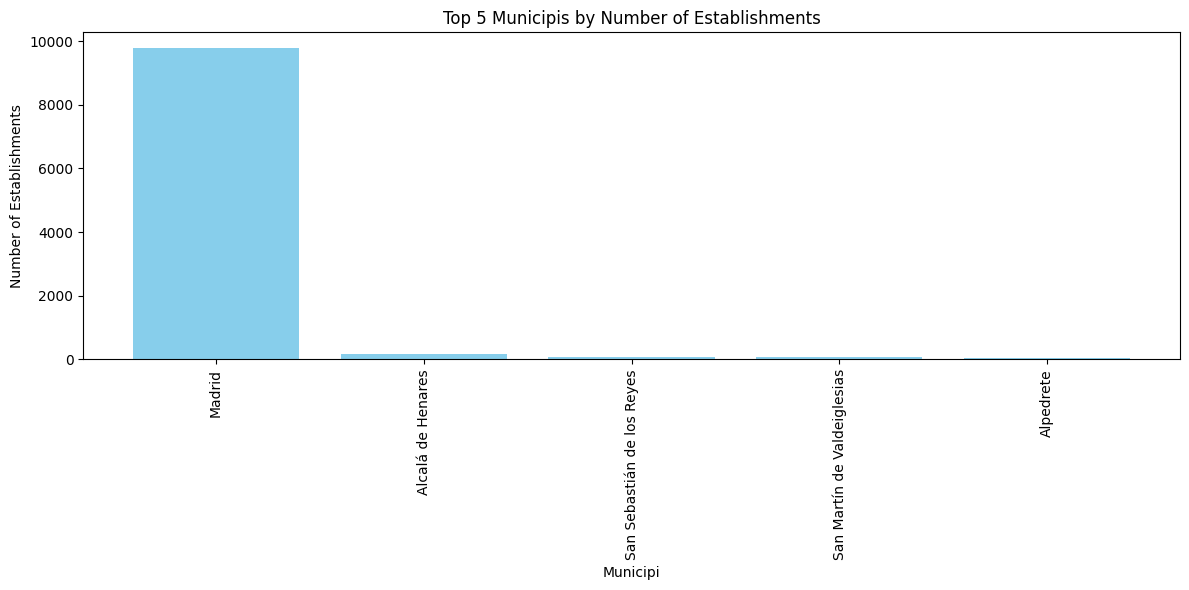

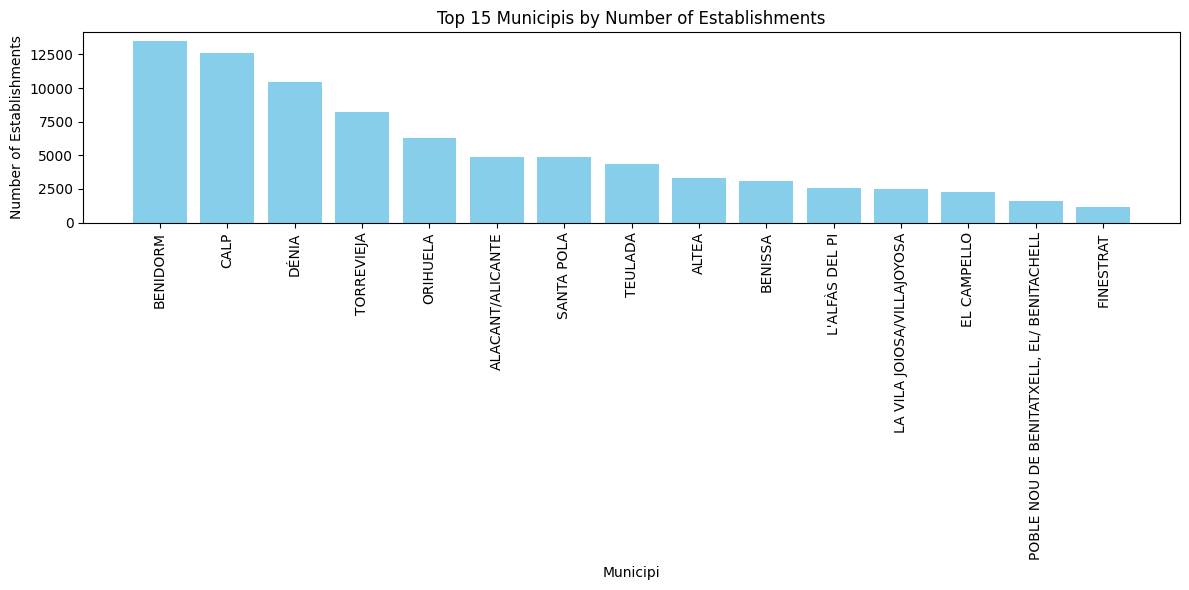

In [92]:
# Example usage for Catalunya dataset
plot_top_categories(mad_filt, 'Municipi', top_n=5)

# Example usage for Mallorca dataset
plot_top_categories(vlc_filt, 'Municipi', top_n=15)